### Download Data

1. You must download the daily time series of prices of a set of stocks. Expected timespan must be at least 5 years. You also need the related market index.

2. The reference market, could be a specific country (ex. Italy) or a subpart of it (ex. FTSE MIB, only Italian Big stocks)

Imports

In [1]:
import numpy as np
import pandas as pd

import time

import matplotlib.pyplot as plt # plotting
import matplotlib.dates as mdates # styling dates
%matplotlib inline

import datetime as dt # for defining dates
import mplfinance as mpf # matplotlib finance

from functions import *

Web Scraping Tickers list from Wikipedia

In [2]:
# ticker list from Wikipedia
ES50_url = 'https://en.wikipedia.org/wiki/EURO_STOXX_50'

# read in the url and scrape ticker data
data_table = pd.read_html(ES50_url)

tickers_ES50 = data_table[3]['Ticker'].tolist()

Tickers

In [3]:
tickers_ES50 = ['^STOXX50E'] + tickers_ES50
tickers_ES50

['^STOXX50E',
 'ADS.DE',
 'ADYEN.AS',
 'AD.AS',
 'AI.PA',
 'AIR.PA',
 'ALV.DE',
 'ABI.BR',
 'ASML.AS',
 'CS.PA',
 'BAS.DE',
 'BAYN.DE',
 'BBVA.MC',
 'SAN.MC',
 'BMW.DE',
 'BNP.PA',
 'CRG.IR',
 'BN.PA',
 'DB1.DE',
 'DPW.DE',
 'DTE.DE',
 'ENEL.MI',
 'ENI.MI',
 'EL.PA',
 'FLTR.IR',
 'RMS.PA',
 'IBE.MC',
 'ITX.MC',
 'IFX.DE',
 'INGA.AS',
 'ISP.MI',
 'KER.PA',
 'KNEBV.HE',
 'OR.PA',
 'LIN.DE',
 'MC.PA',
 'MBG.DE',
 'MUV2.DE',
 'RI.PA',
 'PHIA.AS',
 'PRX.AS',
 'SAF.PA',
 'SAN.PA',
 'SAP.DE',
 'SU.PA',
 'SIE.DE',
 'STLA.MI',
 'TTE.PA',
 'DG.PA',
 'VOW.DE',
 'VNA.DE']

In [4]:
ticker_ndx = ['^STOXX50E']
ticker_ndx

['^STOXX50E']

In [ ]:
# save to .txt file
with open("../data/tickers_ES50.txt", "w") as output:
    output.write(str(tickers_ES50))

Download stock data and save to CSV

In [5]:
# define start date and end date
start="2017-01-01"
end="2022-06-01"

In [6]:
# folder used to store stock data
folder = "../data/raw/"

In [7]:
# get price data from Yahoo - ES50
tickers_data = get_Yahoo_data_ES50(tickers_ES50)

In [8]:
# get price data from Yahoo - Index
ndx_data = get_Yahoo_data_ndx(ticker_ndx)

In [9]:
df_ES50 = pd.read_csv('../data/raw/ES50.csv', header=1)
df_ES50 = df_ES50.iloc[:, : 52]
df_ES50 = df_ES50.drop([0])
df_ES50 = df_ES50.rename(columns={"Symbols": "Date", "^STOXX50E": "EuroStoxx50"})
df_ES50.head()

,Date,EuroStoxx50,ADS.DE,ADYEN.AS,AD.AS,AI.PA,AIR.PA,ALV.DE,ABI.BR,ASML.AS,...,SAF.PA,SAN.PA,SAP.DE,SU.PA,SIE.DE,STLA.MI,TTE.PA,DG.PA,VOW.DE,VNA.DE
1,2016-01-04,3164.760010,78.004707,NaN,15.247333,63.063118,53.968327,111.405846,90.266624,74.629242,...,57.882877,59.244190,63.260578,41.909256,68.110123,4.946972,27.490080,47.195293,117.650673,22.053017
2,2016-01-05,3178.010010,77.737396,NaN,15.321729,62.687923,55.059048,111.762909,91.510849,75.216354,...,57.576126,59.946838,64.022430,42.097519,68.540154,5.077475,27.239086,47.456890,111.036285,22.200811
3,2016-01-06,3139.320068,76.837410,NaN,15.223837,61.812473,54.331902,112.119972,90.306778,73.464317,...,57.167126,59.137260,64.578133,41.352646,68.269386,4.813435,26.977922,47.178940,110.737564,21.741453
4,2016-01-07,3084.679932,75.643364,NaN,15.145526,60.386761,53.241184,109.799019,88.781578,71.749557,...,56.051670,58.495708,63.941761,40.501366,66.963402,4.655616,26.323318,46.639381,105.446068,21.334026
5,2016-01-08,3033.469971,74.360207,NaN,15.176851,59.467541,52.106125,108.406448,86.333267,68.720772,...,55.410286,57.029305,63.681831,40.644611,66.501534,4.464415,25.336323,46.484043,106.726273,20.994507


In [10]:
df_ndx = pd.read_csv('../data/raw/ES50_index.csv', header=1)
df_ndx = df_ndx.iloc[:, : 2]
df_ndx = df_ndx.drop([0])
df_ndx = df_ndx.rename(columns={"Symbols": "Date", "^STOXX50E": "EuroStoxx50"})
df_ndx.head()

,Date,EuroStoxx50
1,2016-01-04,3164.760010
2,2016-01-05,3178.010010
3,2016-01-06,3139.320068
4,2016-01-07,3084.679932
5,2016-01-08,3033.469971


In [11]:
df_ES50['Date'] = pd.to_datetime(df_ES50['Date'])
df_ndx['Date'] = pd.to_datetime(df_ndx['Date'])

Data Visualization - Index

In [12]:
df_ndx.set_index(df_ndx['Date'], inplace=True)
df_ndx.head()

,Date,EuroStoxx50
Date,,
2016-01-04,2016-01-04,3164.760010
2016-01-05,2016-01-05,3178.010010
2016-01-06,2016-01-06,3139.320068
2016-01-07,2016-01-07,3084.679932
2016-01-08,2016-01-08,3033.469971


Text(0.5, 1.0, 'Euro Stoxx 50 Index Price 1/1/17 - 1/6/22')

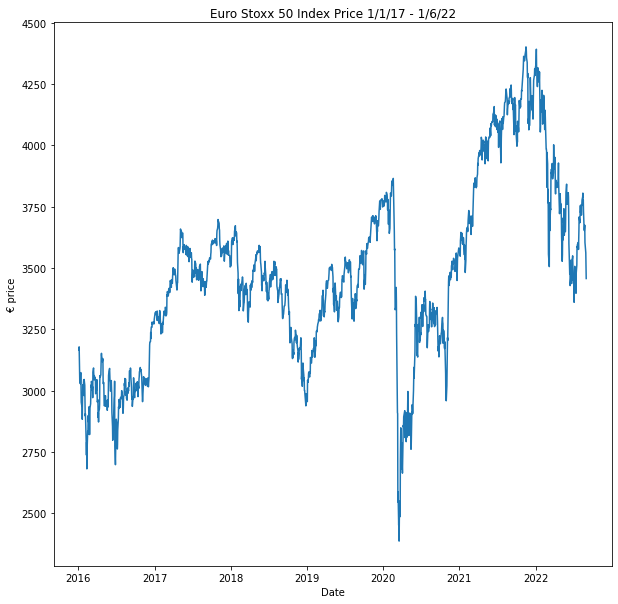

In [13]:
plt.figure(figsize=(10,10))
plt.plot(df_ndx.index, df_ndx['EuroStoxx50'])
plt.xlabel("Date")
plt.ylabel("€ price")
plt.title("Euro Stoxx 50 Index Price 1/1/17 - 1/6/22")